<h1> 🚗 Definicion del Objetivo: </h1>

Una consecionaria de autos  Argentina, aspira a ganar mercado ofreciendo un cotizador on line para diferenciarse de la competencia, ampliar su oferta y reducir costos. El cotizador ofreceria al dueño del vehiculo el precio el que se podria publicar su vehiculo en el portal de manera de resultar competitivo. El propietario del bien accederia a un mercado mucho mayor e interesado en comprar un bien de su tipo. El portal se mantendria con publicidad y aseguraria a ambas partes realizar el mejor negocio.

Han contratado a nuestro empresa de consultoría para comprender los factores de los que depende el precio de los automóviles. Específicamente, quieren comprender los factores que afectan el precio de los automóviles en el mercado y asi saber que valora mas el cliente. Para resolver este caso, utilizaremos algoritmos de aprendizaje supervisado. La empresa quiere saber:

¿Qué variables son significativas para predecir el precio de un automóvil? Qué tan bien describen esas variables el precio de un automovil

Objetivo comercial Debemos modelar el precio de los automóviles con las variables independientes disponibles. La agencia lo utilizará para comprender cómo varían exactamente los precios con las variables independientes. En consecuencia, podran identificar que variable es mas valorada en el mercado y cuento peso tiene en el valor del vehiculo. Además, el modelo será una buena manera para que la agencia entienda la dinámica de precios del mercado, ya que al concretarse la operacion, estara validando el precio estimado.

Para el analisis utilizaremos un dataset extraido de  Mercado Libre https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


<h1> Importando los Datos 📅</h1>

In [2]:
df_auto = pd.read_csv("argentina_cars.csv")

df_auto.head()

money    brand          model  year        color fuel_type  door  \
0  10350000   Toyota  Corolla Cross  2022     Plateado     Nafta   5.0   
1  10850000     Jeep        Compass  2022       Blanco     Nafta   5.0   
2     35500     Jeep        Compass  2022  Gris oscuro     Nafta   5.0   
3     19000  Citroën      C4 Cactus  2022  Gris oscuro     Nafta   5.0   
4   5800000   Toyota        Corolla  2019         Gris     Nafta   4.0   

         gear motor body_type  kilometres currency  
0  Automática   NaN       SUV         500    pesos  
1  Automática   2.4       SUV         500    pesos  
2  Automática   2.4       SUV         500  dólares  
3  Automática   NaN       SUV         550  dólares  
4      Manual   1.8     Sedán        9000    pesos

<h1> Formato de la base  🔎</h1>

In [3]:

df_auto.shape

(510, 12)

Estamos en precencia de un data frame con 510 filas y 12 columnas

In [4]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [5]:
df_auto.nunique()

money         343
brand          27
model         157
year           20
color          14
fuel_type       4
door            4
gear            2
motor          29
body_type      10
kilometres    247
currency        2
dtype: int64

Observamos que tenemos dos tipos de moneda en las publicaciones, USD y pesos Argentinos. Debemos unificarlas.

In [6]:
df_auto.describe()

money         year        door     kilometres
count  5.100000e+02   510.000000  510.000000     510.000000
mean   3.970188e+06  2016.296078    4.474510   74436.370588
std    2.918454e+06     3.728058    0.761511   46771.799272
min    8.000000e+03  1995.000000    2.000000     500.000000
25%    2.312500e+06  2014.000000    4.000000   43000.000000
50%    3.489900e+06  2017.000000    5.000000   65750.000000
75%    5.237500e+06  2019.000000    5.000000   99100.000000
max    1.429900e+07  2022.000000    5.000000  335000.000000

Atento al contexto del mercado Argentino, y al estar los precios del dataframe expresados en dolares o pesos unificaremos todos a USD al tipo de cambio libre del dia de extracion de los datos

#Dólar Libre
#Compra
#$317.00
#Venta
#$321.00
#Actualizado el 17/12/22 02:28 AM


ratio_usd_ars_blue <- 1/319

In [7]:
def convertir_pesos_a_dolares(row):
    tipo_de_cambio = 1/319 # Tipo de cambio ARS/USD
    if row['currency'] == 'pesos':
        return row['money'] * tipo_de_cambio
    else:
        return row['money']

In [8]:
df_auto['monto_convertido'] = df_auto.apply(convertir_pesos_a_dolares, axis=1)

In [9]:
df_auto = df_auto.drop('money', axis=1)

Agregamos una columna con el monto convertido y elimanamos la columna money

In [10]:
df_auto.head()

brand          model  year        color fuel_type  door        gear  \
0   Toyota  Corolla Cross  2022     Plateado     Nafta   5.0  Automática   
1     Jeep        Compass  2022       Blanco     Nafta   5.0  Automática   
2     Jeep        Compass  2022  Gris oscuro     Nafta   5.0  Automática   
3  Citroën      C4 Cactus  2022  Gris oscuro     Nafta   5.0  Automática   
4   Toyota        Corolla  2019         Gris     Nafta   4.0      Manual   

  motor body_type  kilometres currency  monto_convertido  
0   NaN       SUV         500    pesos      32445.141066  
1   2.4       SUV         500    pesos      34012.539185  
2   2.4       SUV         500  dólares      35500.000000  
3   NaN       SUV         550  dólares      19000.000000  
4   1.8     Sedán        9000    pesos      18181.818182

In [11]:
desc = ['monto_convertido','kilometres','door' ,'year']
df_auto[desc].describe()

monto_convertido     kilometres        door         year
count        510.000000     510.000000  510.000000   510.000000
mean       20151.644238   74436.370588    4.474510  2016.296078
std        26749.252839   46771.799272    0.761511     3.728058
min         3761.755486     500.000000    2.000000  1995.000000
25%         9715.282132   43000.000000    4.000000  2014.000000
50%        13385.423197   65750.000000    5.000000  2017.000000
75%        22680.250784   99100.000000    5.000000  2019.000000
max       430000.000000  335000.000000    5.000000  2022.000000

Analicemos si no tenemos outliers.

(510, 12)

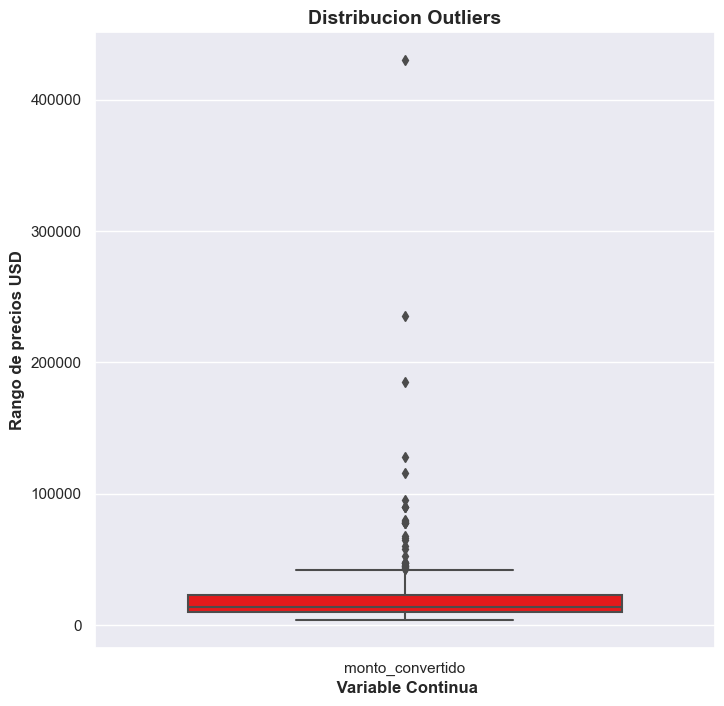

In [12]:

outliers = ['monto_convertido']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Distribucion Outliers", fontsize = 14, fontweight = 'bold')
plt.ylabel("Rango de precios USD", fontweight = 'bold')
plt.xlabel(" Variable Continua", fontweight = 'bold')
df_auto.shape

Encontramos 1 arriba de los USD 400.000

In [13]:
df_auto['monto_convertido'].max()

430000.0

In [14]:
df_auto[df_auto['monto_convertido'] == 430000.0]

brand     model  year color fuel_type  door        gear motor body_type  \
461  Audi  R8 Coupé  2020  Azul     Nafta   2.0  Automática   5.2     Coupé   

     kilometres currency  monto_convertido  
461        3000  dólares          430000.0

Concluimos que no se trata de un outliners

<h1> Analisis univariado  🔎</h1>

Visualización de los diferentes marcas de autos disponibles

Text(0, 0.5, 'Cantidad de autos')

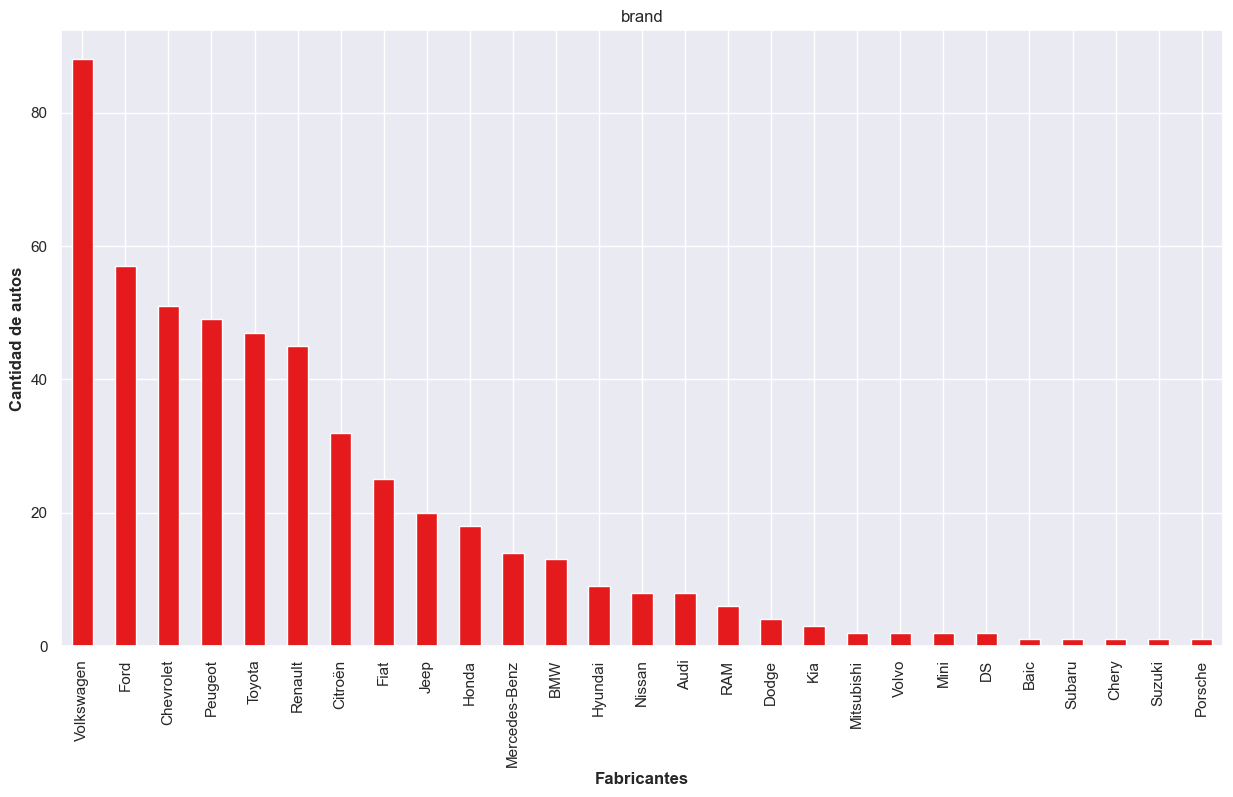

In [15]:

plt.rcParams['figure.figsize'] = [15,8]
ax=df_auto['brand'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('brand')
plt.xlabel("Fabricantes",fontweight = 'bold')
plt.ylabel("Cantidad de autos",fontweight = 'bold')

Insights: El marca con mas autos a la venta es Volkswagen y la con menos Porsche

Atento a que la agencia se focaliza en autos nacionales, tomaremos de la base solo aquellos que cuentan con terminales en Argentina.

In [16]:
var = 'brand'
df_auto[var].value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Mitsubishi        2
Volvo             2
Mini              2
DS                2
Baic              1
Subaru            1
Chery             1
Suzuki            1
Porsche           1
Name: brand, dtype: int64

In [17]:
df_auto_nac = df_auto.loc[df_auto['brand'].isin(['Volkswagen', 'Ford', 'Chevrolet', 'Peugeot', 'Toyota', 'Renault', 'Citroën', 'Fiat', 'Honda'])]

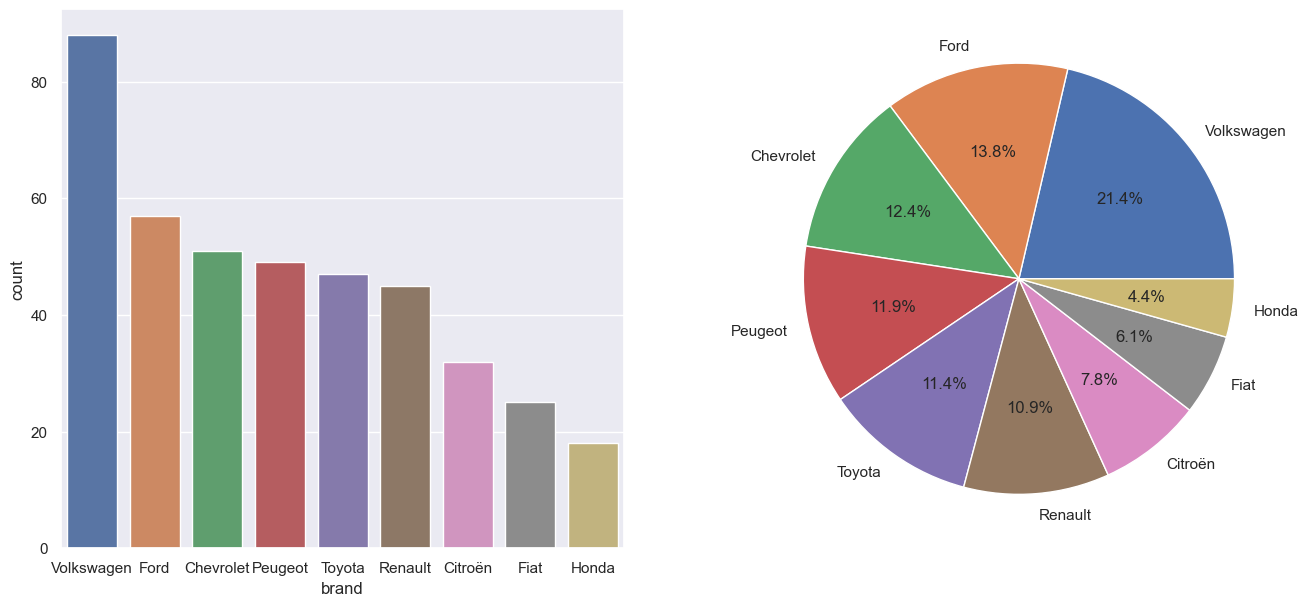

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (16, 7))
sns.countplot(data = df_auto_nac, x = 'brand', ax = ax[0], order=df_auto_nac['brand'].value_counts().index)

ax[1].pie(df_auto_nac['brand'].value_counts().values, labels = df_auto_nac['brand'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

Vemos que  la que mas tiene es Volkswagen con el 21.4% y la que menos Honda con el 4,4%.

Veamos como se distribuyen los modelos.

In [19]:
var = 'model'
df_auto_nac[var].value_counts()

Amarok                17
Focus III             13
Corolla               13
208                   13
Onix                  12
                      ..
Qubo                   1
Partner Patagónica     1
Partner                1
C-Elysée               1
504                    1
Name: model, Length: 108, dtype: int64

Analicemos la antiguedad de los vehiculos.

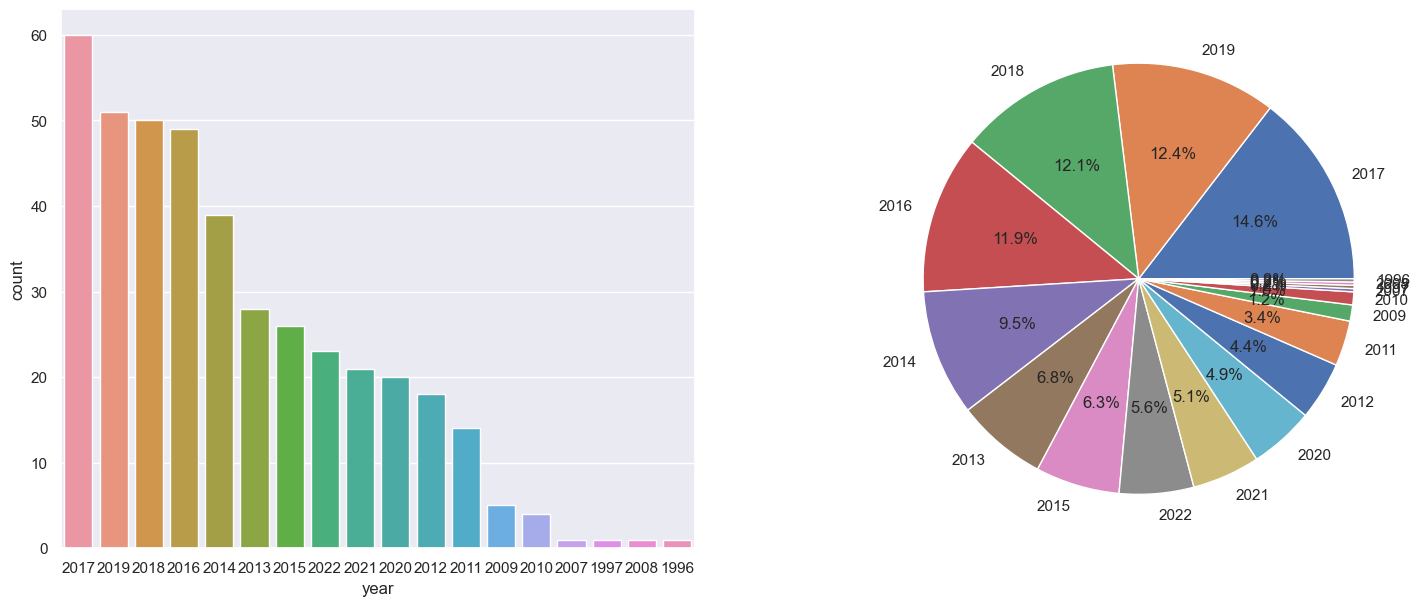

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
sns.countplot(data = df_auto_nac, x = 'year', ax = ax[0], order=df_auto_nac['year'].value_counts().index)

ax[1].pie(df_auto_nac['year'].value_counts().values, labels = df_auto_nac['year'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

Revisemos que pasa con los colores.

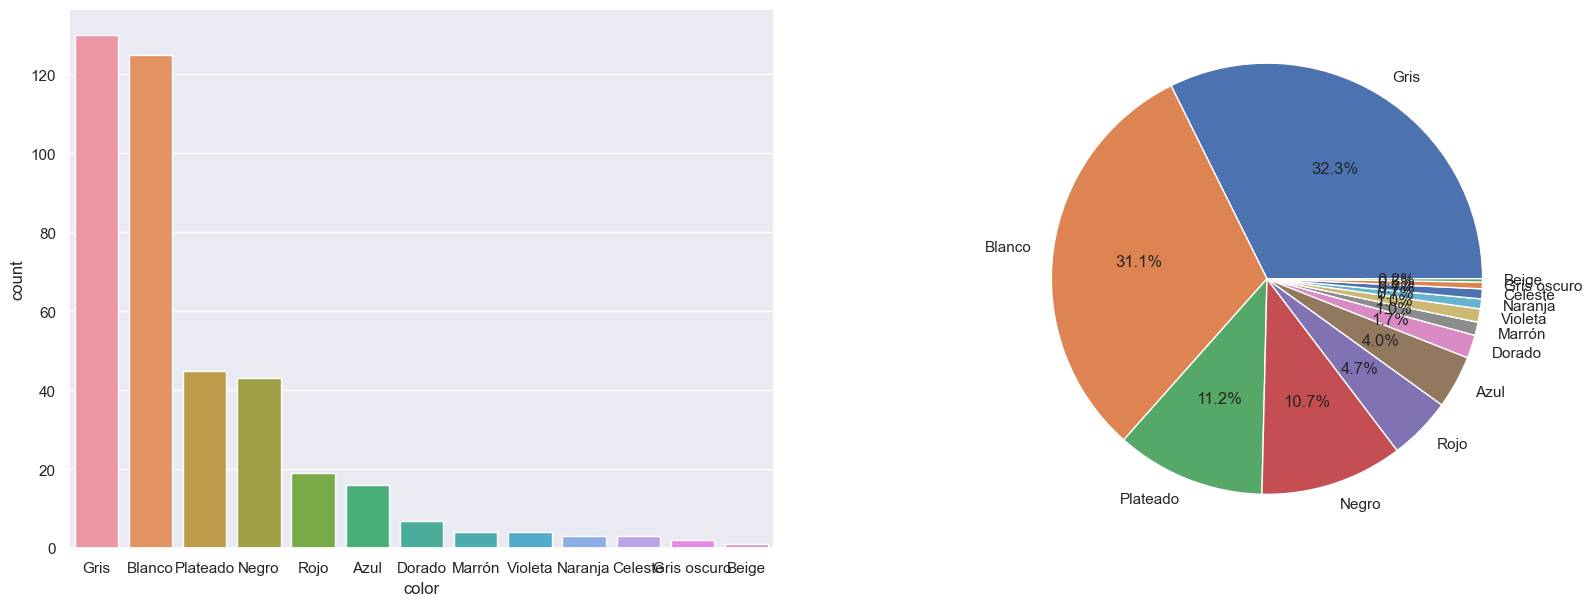

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.countplot(data = df_auto_nac, x = 'color', ax = ax[0], order=df_auto_nac['color'].value_counts().index)

ax[1].pie(df_auto_nac['color'].value_counts().values, labels = df_auto_nac['color'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

Que combustible tiene mas presencia?

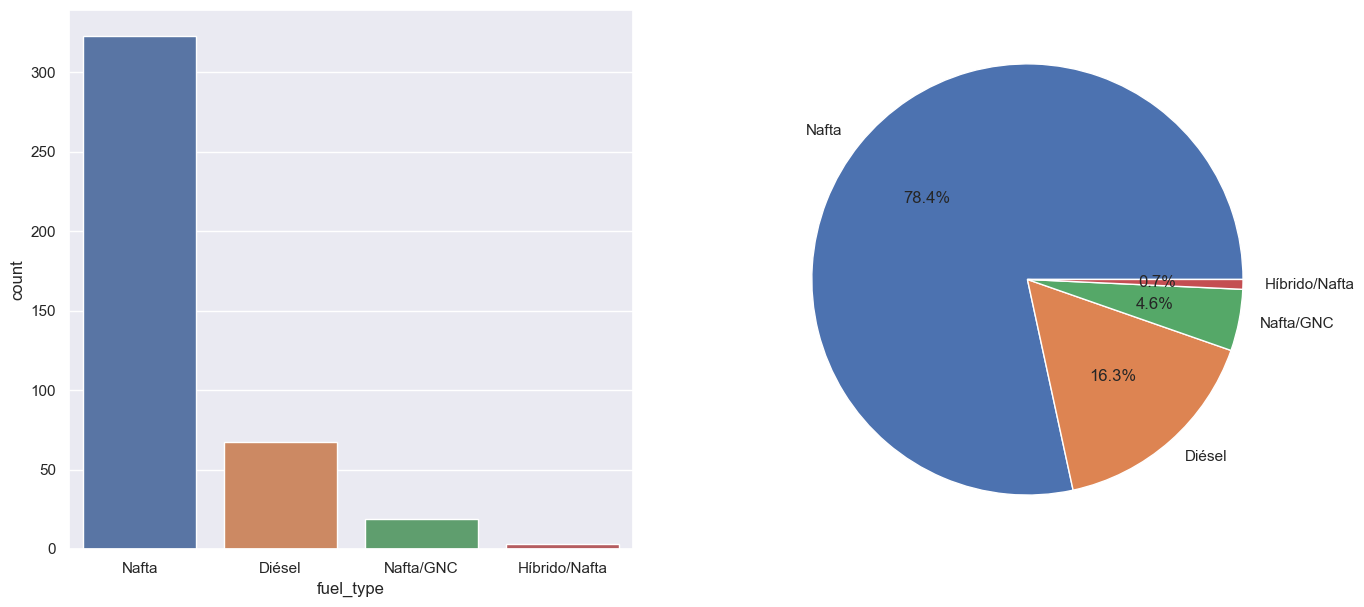

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (16, 7))
sns.countplot(data = df_auto_nac, x = 'fuel_type', ax = ax[0], order=df_auto_nac['fuel_type'].value_counts().index)

ax[1].pie(df_auto_nac['fuel_type'].value_counts().values, labels = df_auto_nac['fuel_type'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

Observemos otras caracteristicas de los automoviles en venta, como puertas, transmision y tipo.

<AxesSubplot:xlabel='body_type', ylabel='count'>

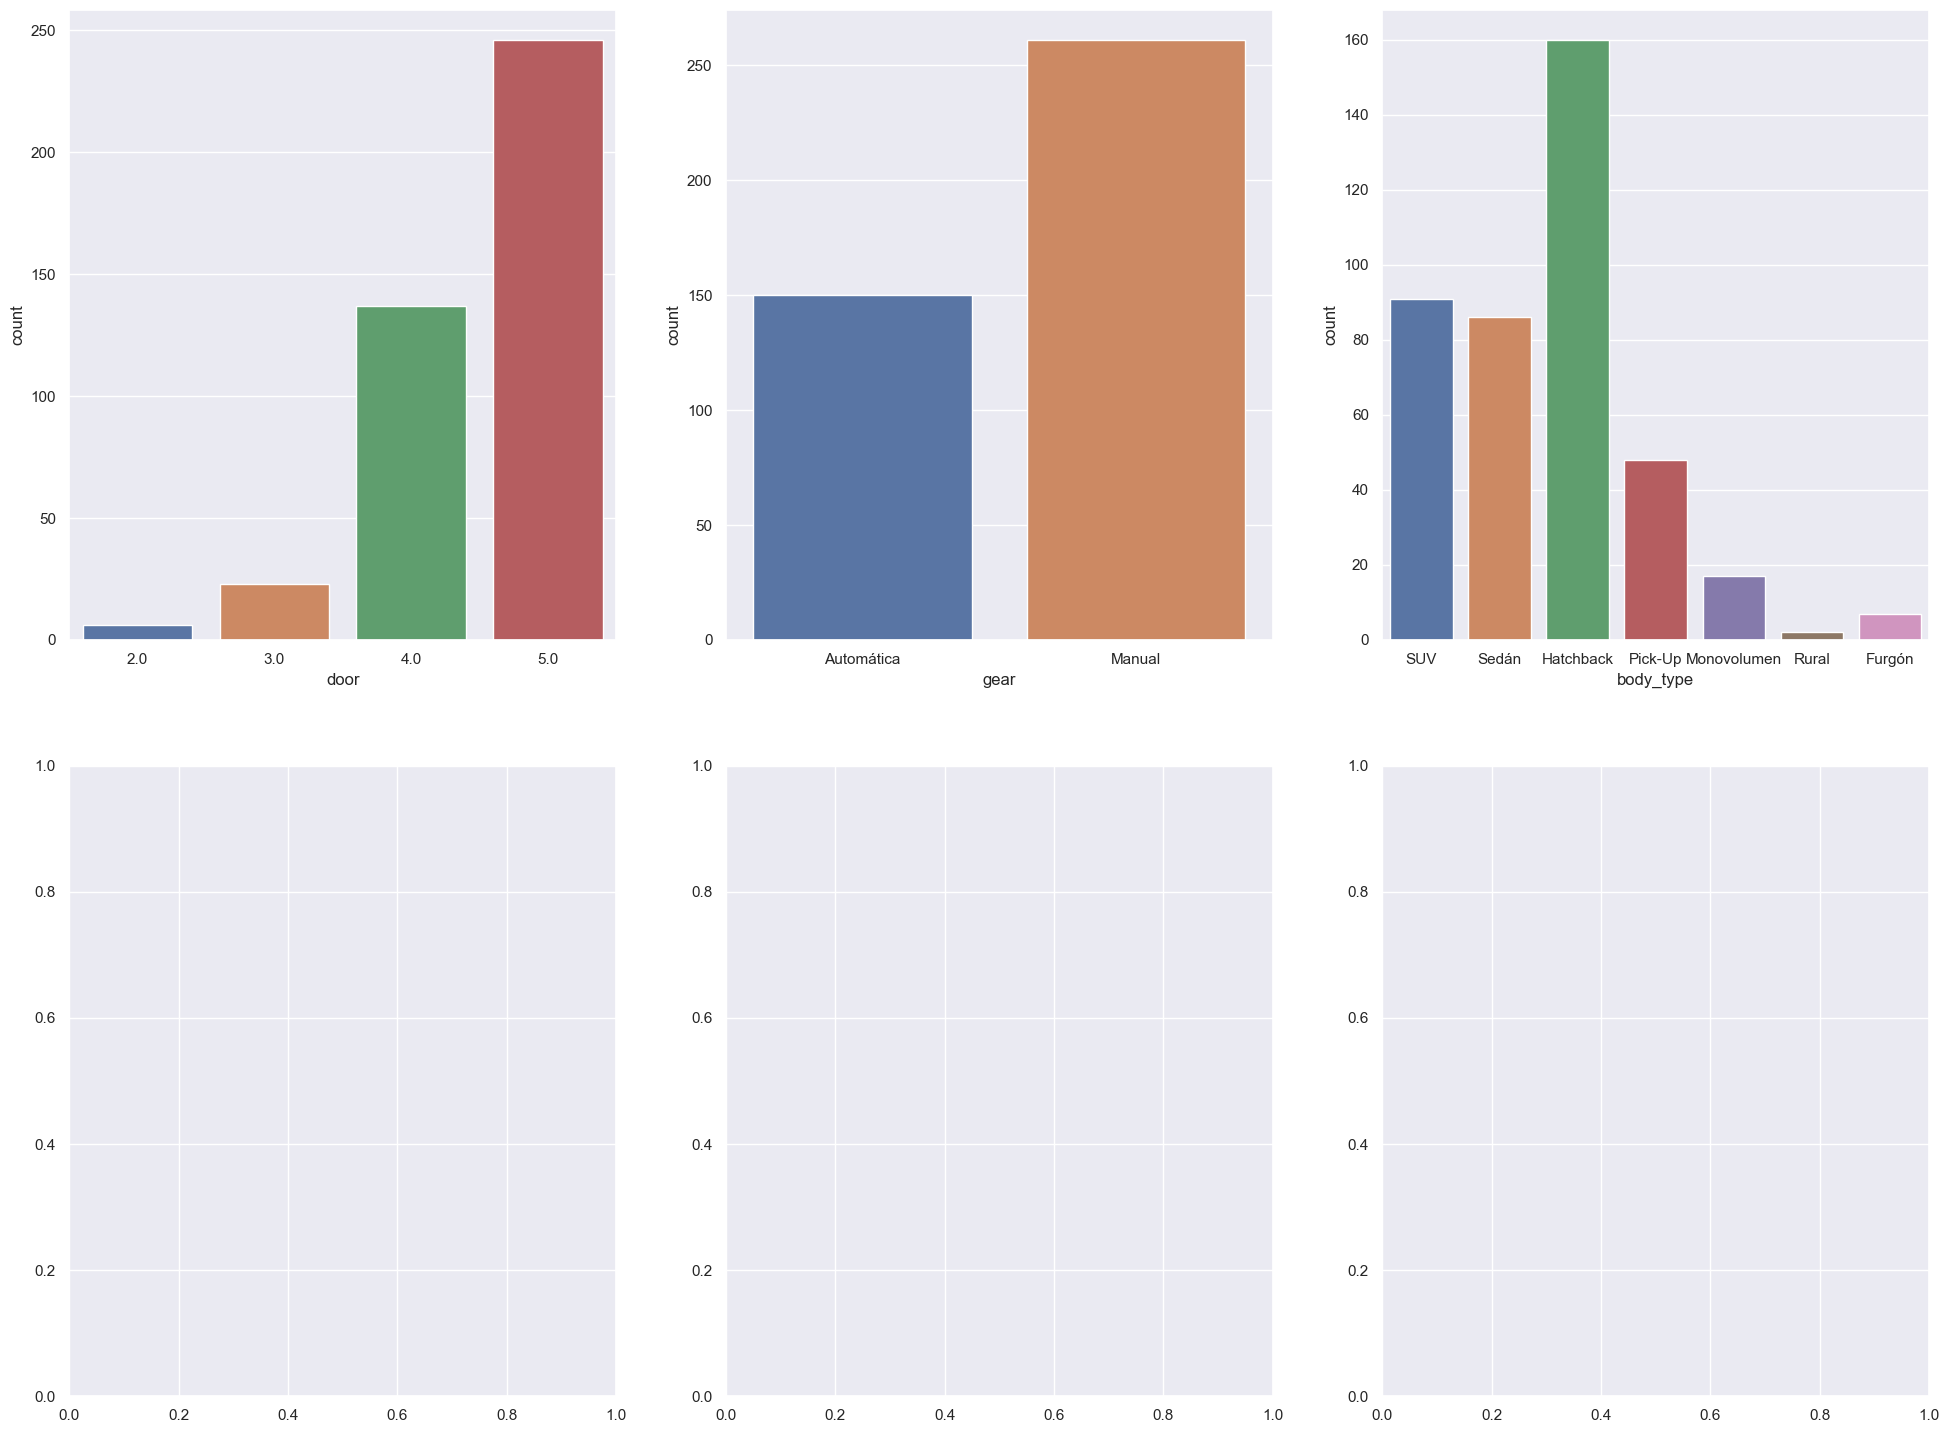

In [23]:
fig, ax = plt.subplots(2, 3, figsize = (24, 18))
sns.countplot(data = df_auto_nac, x = 'door', ax = ax[0, 0])
sns.countplot(data = df_auto_nac, x = 'gear', ax = ax[0, 1])
sns.countplot(data = df_auto_nac, x = 'body_type', ax = ax[0, 2])

#plt.show()

Observemos la distribucion de los precios

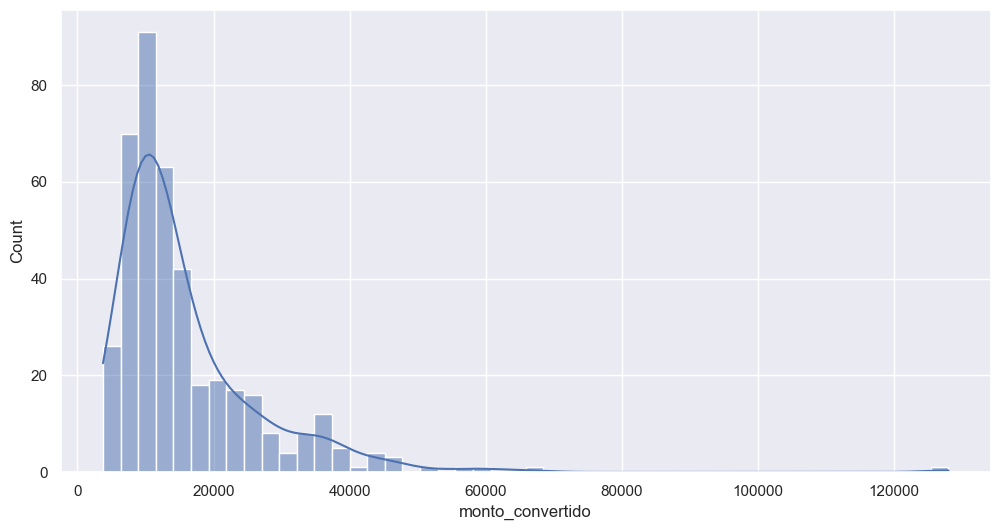

In [24]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = df_auto_nac, x = df_auto_nac['monto_convertido'], kde = True)
plt.show()



La mayoria de los autos estan entre los USD 1.000 y 50.000

Analicemos el resto de las caracteristicas.

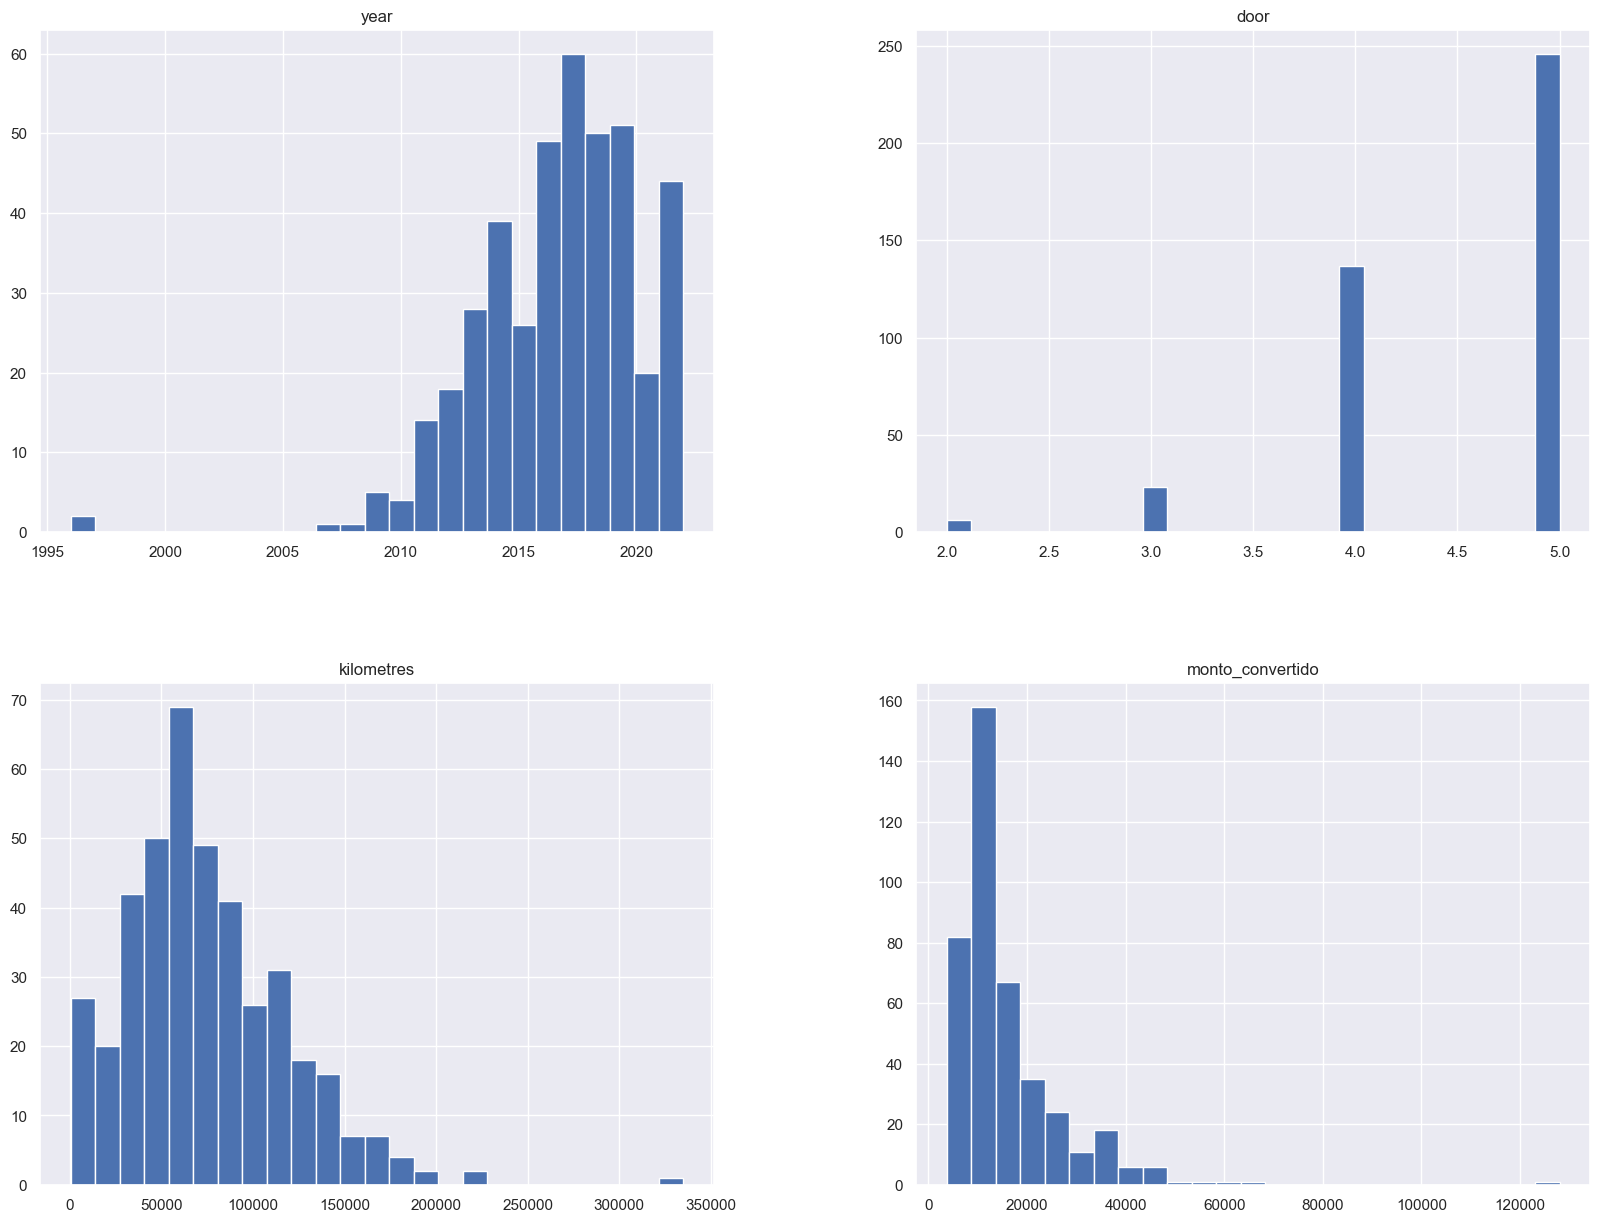

In [25]:
%matplotlib inline

df_auto_nac.hist(bins=25, figsize=(20,15))
plt.show()

<h1> Analisis bivariado  🔎</h1>

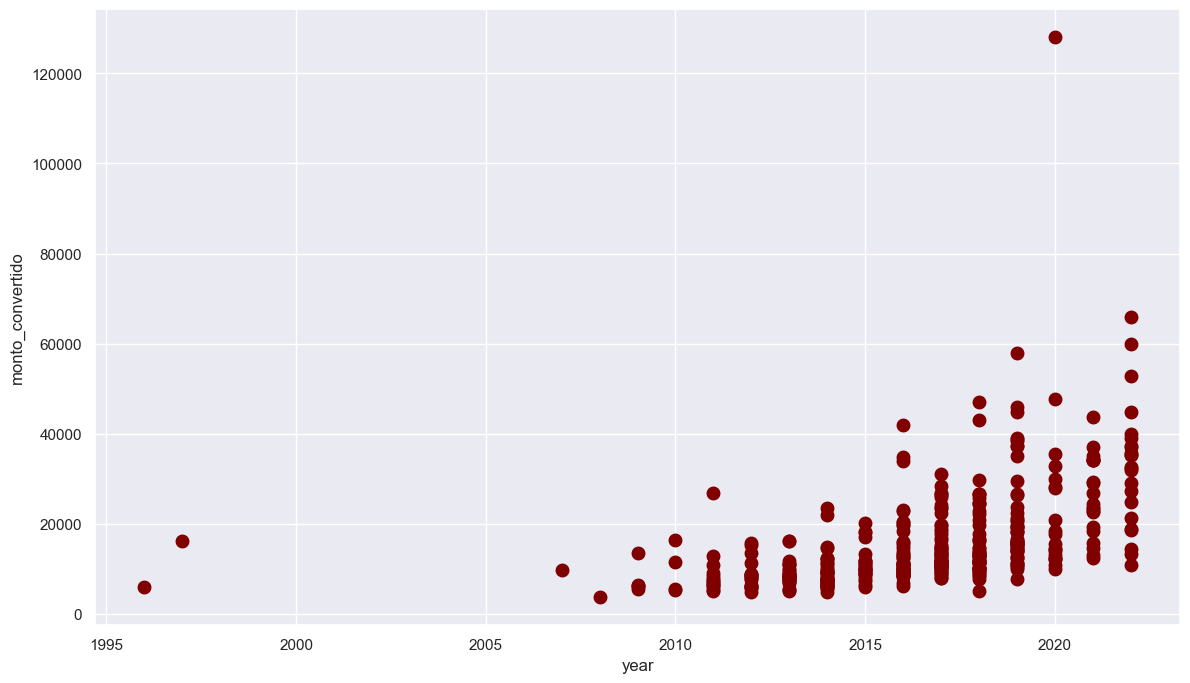

In [26]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = df_auto_nac, x = 'year', y = 'monto_convertido', linewidth = 4, color = '#800000', edgecolor = "#800000")
plt.show()

Vemos que a menor antiguedad mayor precio. 

Observemos relacion entre precio medio segun el tipo

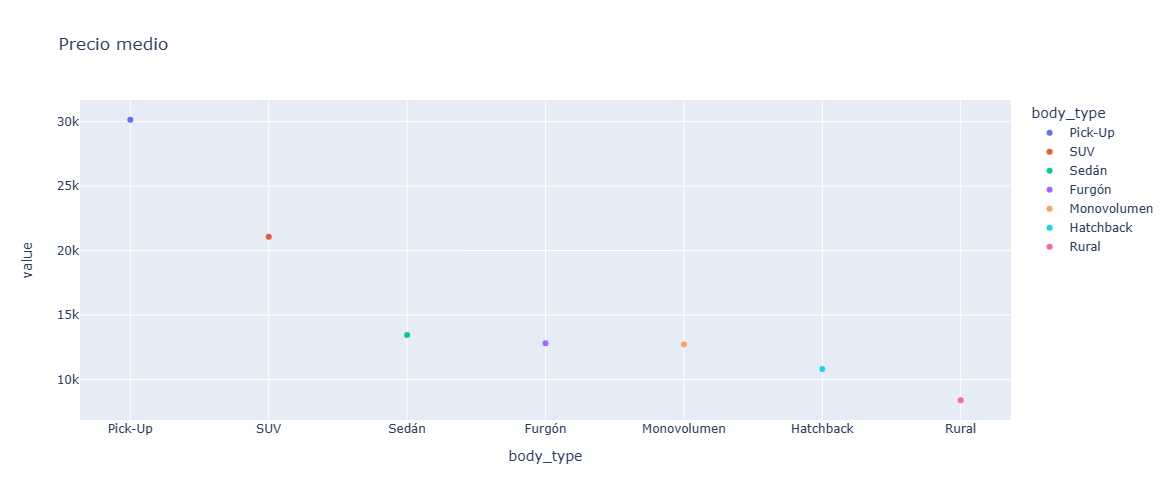

In [27]:
agg = df_auto_nac.groupby('body_type')['monto_convertido'].mean().sort_values(ascending=False)
fig = px.scatter(agg , color = agg.index , width=900 , height =500,title='Precio medio')
fig.show()

Concluimos que las pick-up tienen el precio promedio mas alto, en el otro lado estan los hatchback.

Revisemos que pasa con los kilometros recorridos.

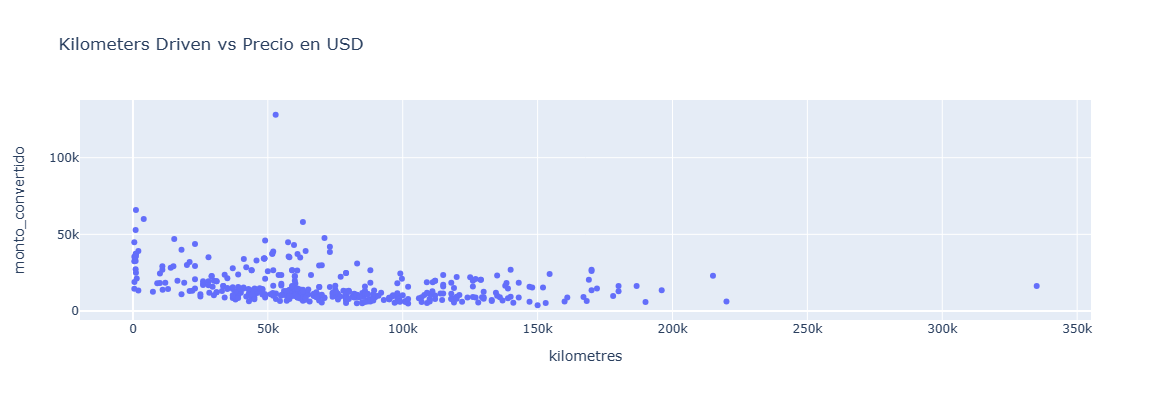

In [28]:
fig = px.scatter(df_auto_nac,x='kilometres',y='monto_convertido' , width=800 , height =400,title='Kilometers Driven vs Precio en USD')
fig.show()

La conclusion obvia, a menos km, mas caro.

Revisemos precios medios por Marca.

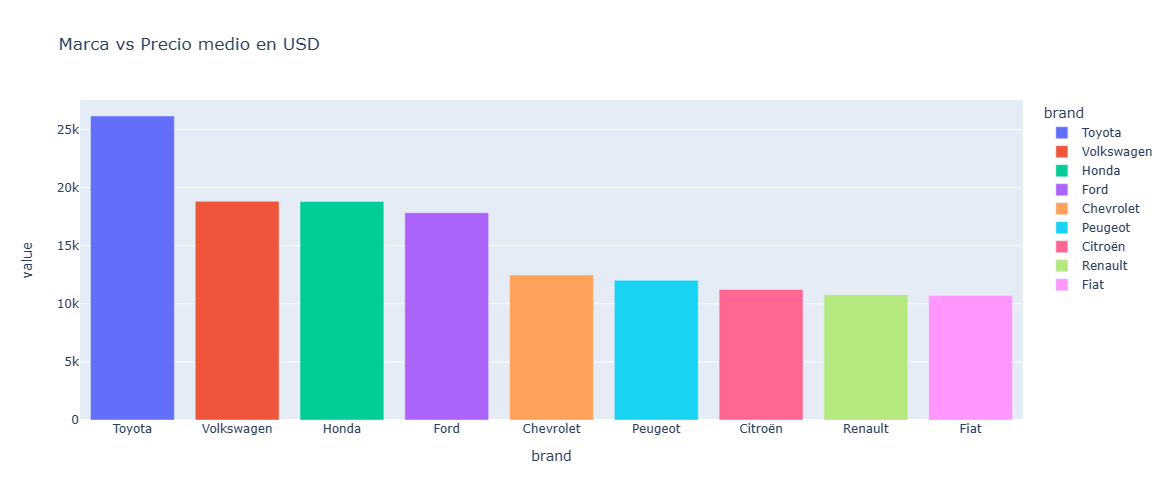

In [29]:
agg = df_auto_nac.groupby('brand')['monto_convertido'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =500,title='Marca vs Precio medio en USD')
fig.show()


<h1> Analisis multivariado  🔎</h1>

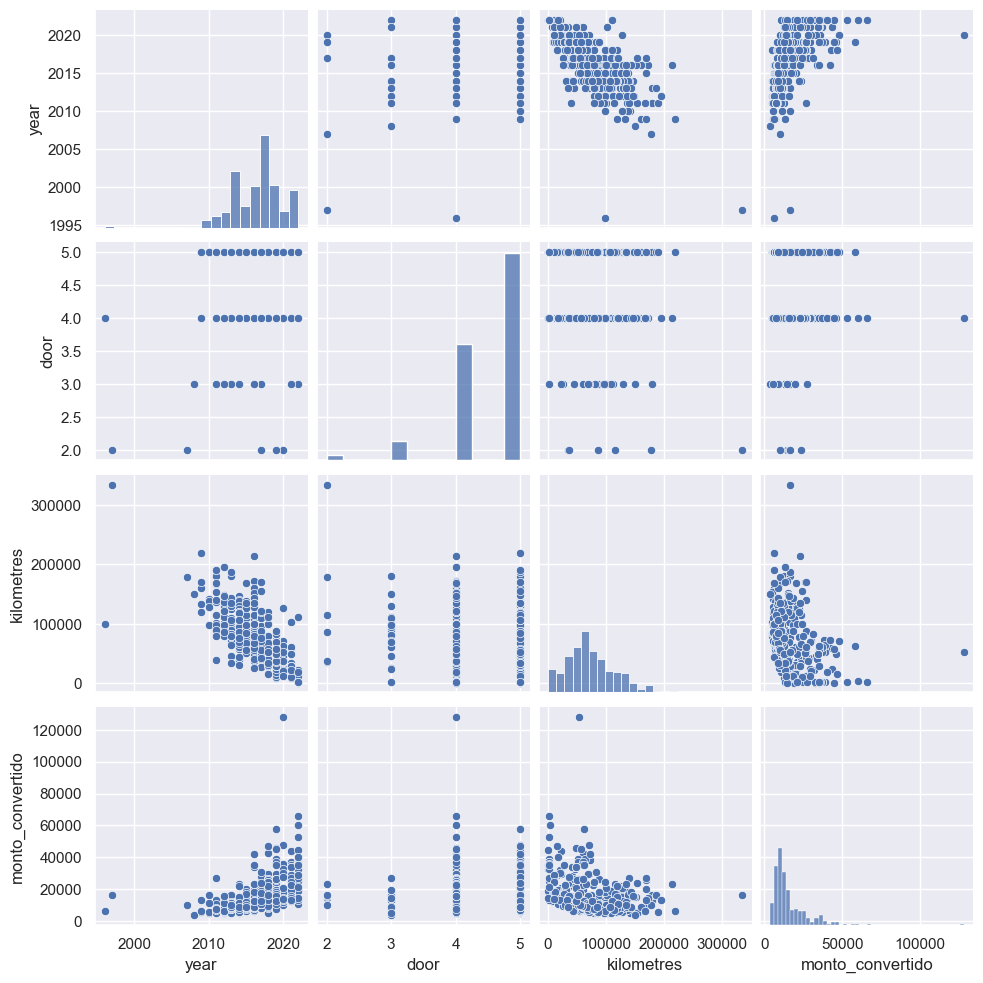

In [30]:
sns.pairplot(df_auto_nac);

Matriz de correlacion

Ya que el valor que más nos interesa es el referente al Precio de los vehículos (nuestra variable objetivo), es importante ver la relación del mismo con las demás variables (independientes) que describen a cada uno de ellos. Por este motivo, armaremos una matriz de correlación, la cual nos permitira comprender la relación entre las diversas variables. La misma se ve de la siguiente manera:

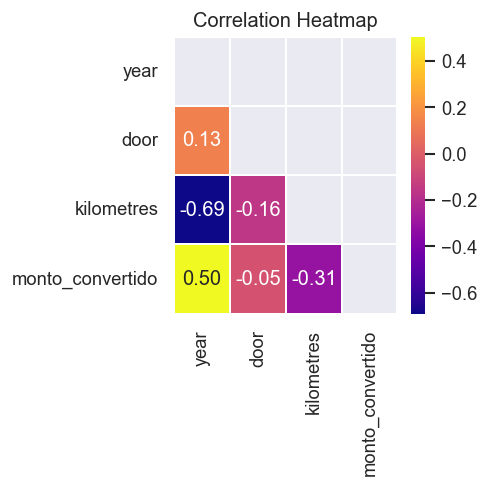

In [31]:
plt.figure(dpi = 120,figsize= (3,3))
mask = np.triu(np.ones_like(df_auto_nac.corr(),dtype = bool))
sns.heatmap(df_auto_nac.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()


   Analizando la matriz, podemos visualizar que El Precio tiene una relación muy fuerte con la antiguedad (0.50) y con los kilometros (- 0.31). A mas km menor precio, a mayor antiguedad, menor precio. Esto quiere decir, que las variables mencionadas inciden  en el precio de manera significativa. Si ellas sufren una modificación, también la sufrirá el Precio.


Veamos que  vehiculos se publican en dolares.

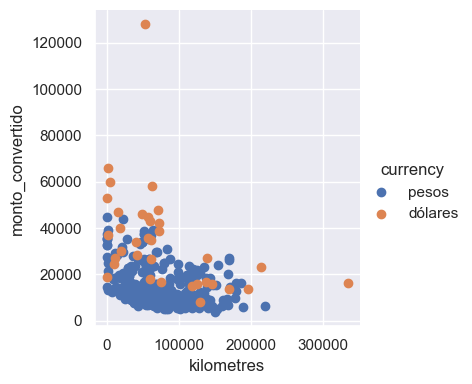

In [32]:
sns.FacetGrid(df_auto_nac, hue = 'currency' , height = 4).map(plt.scatter,'kilometres','monto_convertido').add_legend();
plt.show()

Vemos que al subir los precios de los vehiculos, suben las publicaciones en dolares.

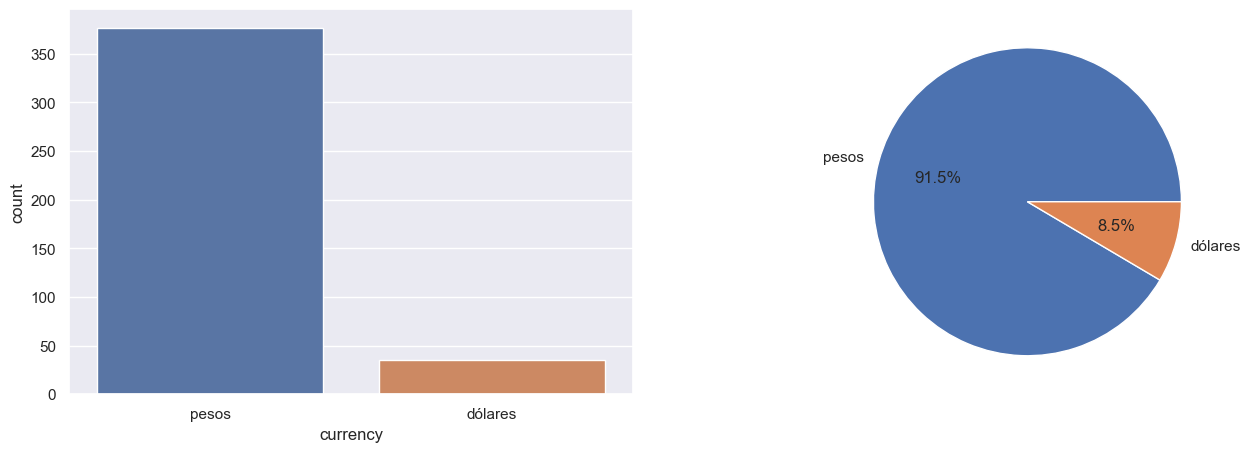

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
sns.countplot(data = df_auto_nac, x = 'currency', ax = ax[0], order=df_auto_nac['currency'].value_counts().index)

ax[1].pie(df_auto_nac['currency'].value_counts().values, labels = df_auto_nac['currency'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

Los vehiculos de mayor valor se publican en dolares, sin embargo representan solo el 8%.

Veamos que ocurre con las transmisiones.

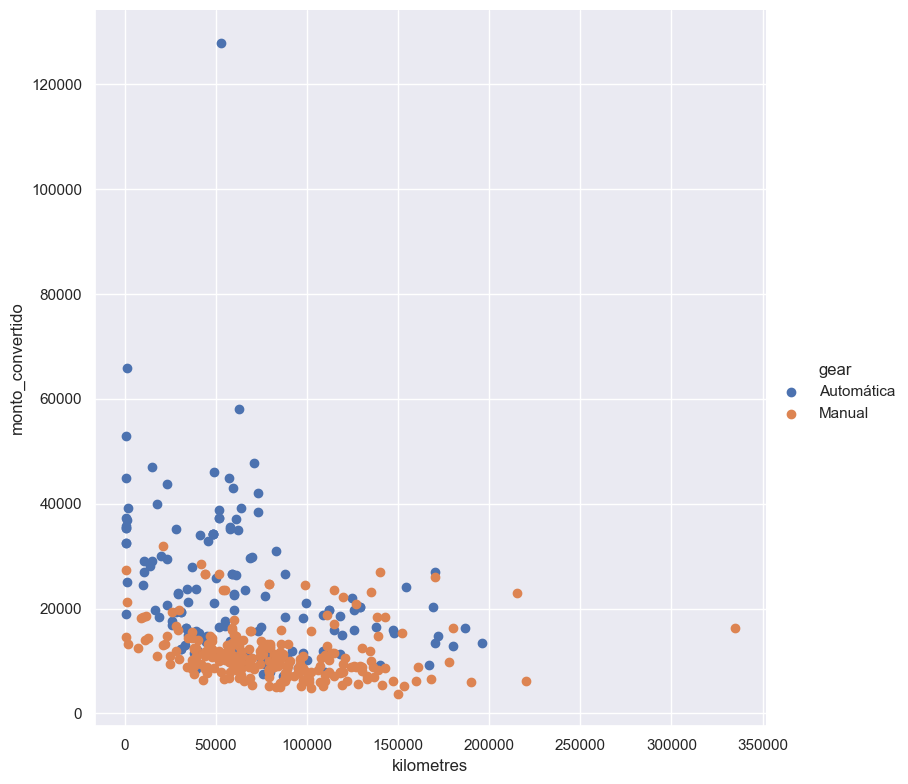

In [34]:
sns.FacetGrid(df_auto_nac, hue = 'gear' , height = 8).map(plt.scatter,'kilometres','monto_convertido').add_legend();
plt.show()

Los vehiculos con caja manual son mas economicos.

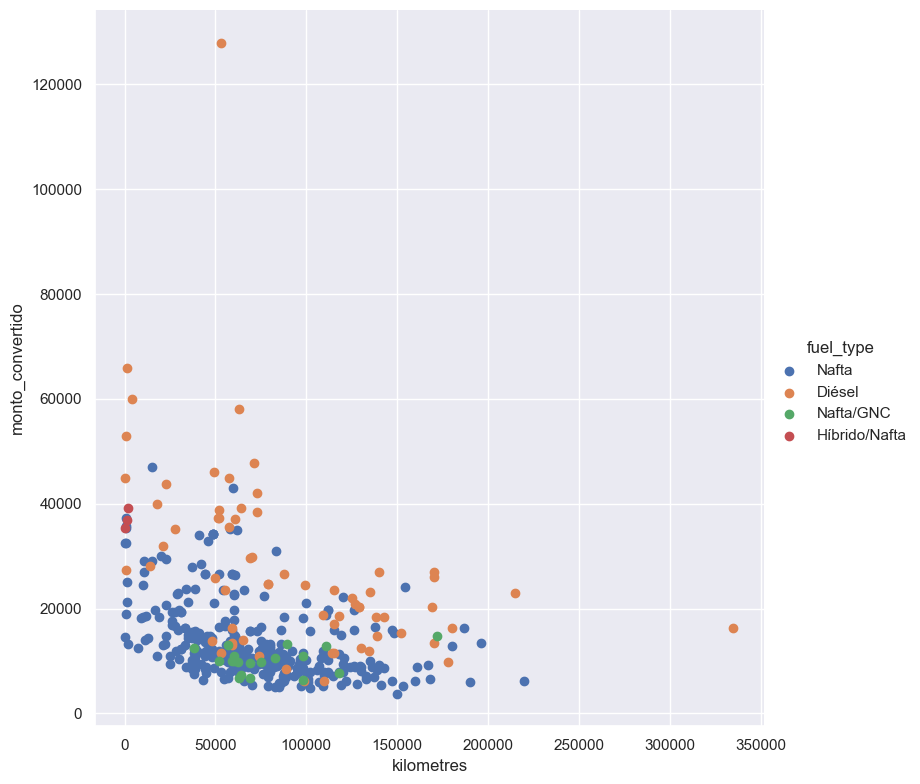

In [35]:
sns.FacetGrid(df_auto_nac, hue = 'fuel_type' , height = 8).map(plt.scatter,'kilometres','monto_convertido').add_legend();
plt.show()

Se observa que a similar cantidad de km, el mas economico es el Nafta/GNC, seguido por Nafta.

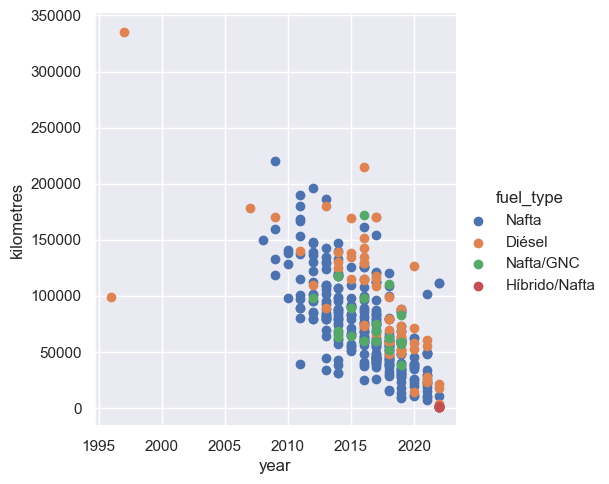

In [36]:
sns.FacetGrid(df_auto_nac, hue = 'fuel_type' , height = 5).map(plt.scatter,'year','kilometres').add_legend();
plt.show()

A partir del 2015 aumenta la participacion de vehiculos diesel.

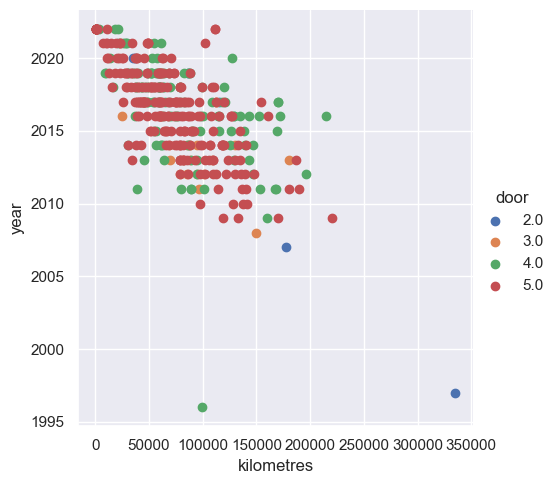

In [37]:
sns.FacetGrid(df_auto_nac, hue = 'door' , height = 5).map(plt.scatter,'kilometres','year').add_legend();
plt.show()

La mayoria son vehiculos de 5 puertas tips hatchback.

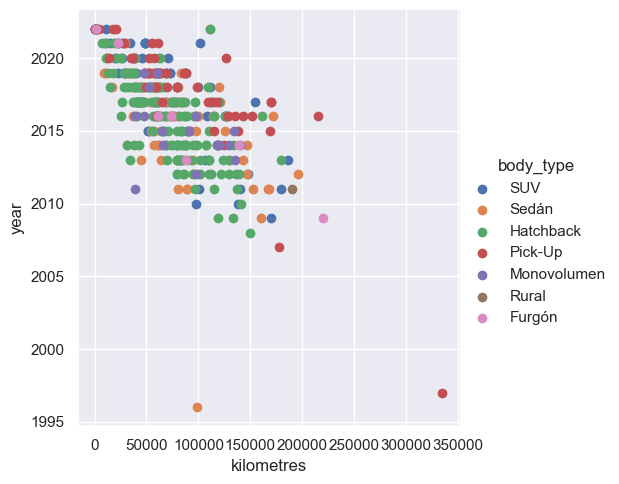

In [38]:
sns.FacetGrid(df_auto_nac, hue = 'body_type' , height = 5).map(plt.scatter,'kilometres','year').add_legend();
plt.show()

La mayoria son hatchback y suv.

In [39]:
df_auto.head()

brand          model  year        color fuel_type  door        gear  \
0   Toyota  Corolla Cross  2022     Plateado     Nafta   5.0  Automática   
1     Jeep        Compass  2022       Blanco     Nafta   5.0  Automática   
2     Jeep        Compass  2022  Gris oscuro     Nafta   5.0  Automática   
3  Citroën      C4 Cactus  2022  Gris oscuro     Nafta   5.0  Automática   
4   Toyota        Corolla  2019         Gris     Nafta   4.0      Manual   

  motor body_type  kilometres currency  monto_convertido  
0   NaN       SUV         500    pesos      32445.141066  
1   2.4       SUV         500    pesos      34012.539185  
2   2.4       SUV         500  dólares      35500.000000  
3   NaN       SUV         550  dólares      19000.000000  
4   1.8     Sedán        9000    pesos      18181.818182

Para reforzar el analisis utilizaremos Pandas Profiling, la misma es una herramienta muy útil para generar informes descriptivos y visuales de un DataFrame en Pandas. Puede ayudarte a entender mejor la distribución y la estructura de tus datos.

In [40]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [41]:
from pandas_profiling import ProfileReport
from IPython.display import display

In [42]:
# Cargar tus datos en un DataFrame (reemplaza esto con tu método de carga de datos)
data = pd.read_csv("argentina_cars.csv")
# Crea un objeto ProfileReport pasando el DataFrame como argumento
profile = ProfileReport(data)

# Genera el informe
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Del reporte se desprende como nuevo la participacion de los distintos motores, la mayoria son 1.6 cc

<h1> Aplicacion de Algoritmos de Machine Learning <h1>

   Al ser el objetivo de este estudio, el de predecir valores continuos (en nuestro caso, será el Precio del auto el valor a predecir), nos enfocaremos en algoritmos de regresion.
   Inicialmente trabajaremos con el algoritmo de Regresión Lineal, método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Probaremos tomando vehiculos de fabricacion nacional, agregando importados y luego cambiaremos el año de fabricacion por la antiguedad.


Trabajemos con el dataframe de autos nacionales.

In [43]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [44]:
# Realizar la codificación one-hot de las variables categóricas
df_encoded = pd.get_dummies(df_auto_nac)

In [45]:
# Cargar el dataset 
X = df_encoded.drop('monto_convertido', axis=1)  # características
y = df_encoded['monto_convertido']  # variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print('Puntaje Testing: ', r2_score(y_test, y_pred))


Puntaje Testing:  0.8183395703084645


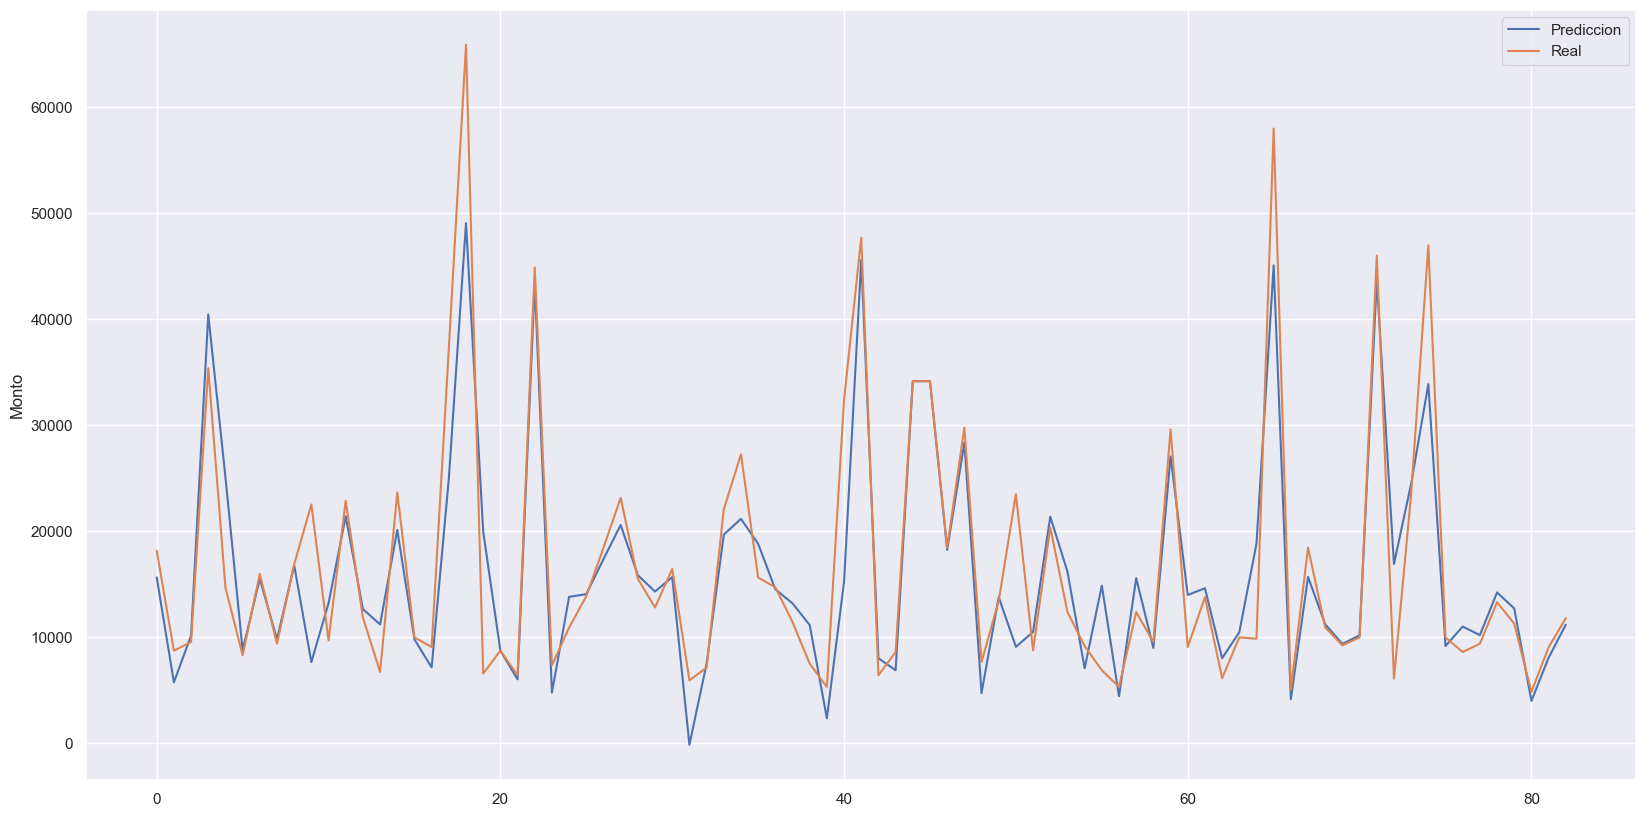

In [46]:
#Ploteamos
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Monto')

plt.legend()
plt.show()

In [47]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
year               905.429957
door               232.001271
kilometres          -0.038092
brand_Chevrolet  -2474.859021
brand_Citroën    -2808.349103
...                       ...
body_type_Rural  -3505.179284
body_type_SUV     4885.579827
body_type_Sedán  -1750.774205
currency_dólares  1761.085006
currency_pesos   -1761.085005

[169 rows x 1 columns]

In [48]:
y_pred = model.predict(X_test)

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual     Predicted
330  18181.818182  15667.452719
78    8745.768025   5760.068132
290   9561.128527  10172.016060
47   35391.849530  40457.998908
346  14702.194357  25116.199725
..            ...           ...
187  13322.884013  14243.222128
240  11285.266458  12728.315495
108   4858.934169   4006.306512
504   9059.561129   8082.032372
209  11815.673981  11201.412298

[83 rows x 2 columns]

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3288.2888893104223
Mean Squared Error: 28905213.77828577
Root Mean Squared Error: 5376.356924376001


In [51]:
automobile_corr = df_encoded.corr()
automobile_corr

year      door  kilometres  monto_convertido  \
year              1.000000  0.133618   -0.691725          0.504614   
door              0.133618  1.000000   -0.160216         -0.048747   
kilometres       -0.691725 -0.160216    1.000000         -0.308918   
monto_convertido  0.504614 -0.048747   -0.308918          1.000000   
brand_Chevrolet  -0.060509  0.009692   -0.024977         -0.115718   
...                    ...       ...         ...               ...   
body_type_Rural  -0.061477  0.050858    0.080435         -0.046616   
body_type_SUV     0.232538  0.335307   -0.153211          0.239094   
body_type_Sedán  -0.072494 -0.356952    0.016330         -0.113899   
currency_dólares  0.048543  0.000978    0.020852          0.498891   
currency_pesos   -0.048543 -0.000978   -0.020852         -0.498891   

                  brand_Chevrolet  brand_Citroën  brand_Fiat  brand_Ford  \
year                    -0.060509      -0.083051   -0.041035   -0.007151   
door                     0.009692       0.062420   -0.042540    0.008481   
kilometres              -0.024977       0.055287    0.032566   -0.052915   
monto_convertido        -0.115718      -0.121013   -0.117514    0.065762   
brand_Chevrolet          1.000000      -0.109072   -0.095531   -0.150610   
...                           ...            ...         ...         ...   
body_type_Rural         -0.026252      -0.020268    0.274795   -0.027986   
body_type_SUV           -0.022466      -0.067067   -0.110819    0.040844   
body_type_Sedán          0.060829      -0.015165   -0.030480   -0.067427   
currency_dólares        -0.088090      -0.055894   -0.040978   -0.021236   
currency_pesos           0.088090       0.055894    0.040978    0.021236   

                  brand_Honda  brand_Peugeot  ...  motor_TOYOTA 2.8  \
year                -0.057645      -0.121852  ...          0.081110   
door                 0.084746       0.088471  ...         -0.037705   
kilometres           0.104411       0.047698  ...         -0.082196   
monto_convertido     0.053264      -0.127370  ...          0.160373   
brand_Chevrolet     -0.080338      -0.138094  ...         -0.018540   
...                       ...            ...  ...               ...   
body_type_Rural     -0.014928      -0.025661  ...         -0.003445   
body_type_SUV        0.201067      -0.051022  ...         -0.026263   
body_type_Sedán     -0.109781       0.051140  ...         -0.025335   
currency_dólares     0.062645      -0.058160  ...          0.161888   
currency_pesos      -0.062645       0.058160  ...         -0.161888   

                  body_type_Furgón  body_type_Hatchback  \
year                     -0.023680            -0.171839   
door                     -0.184591             0.290326   
kilometres                0.037627            -0.012848   
monto_convertido         -0.036670            -0.361557   
brand_Chevrolet          -0.049414             0.018058   
...                            ...                  ...   
body_type_Rural          -0.009182            -0.055652   
body_type_SUV            -0.069999            -0.424256   
body_type_Sedán          -0.067525            -0.409261   
currency_dólares         -0.040058            -0.117751   
currency_pesos            0.040058             0.117751   

                  body_type_Monovolumen  body_type_Pick-Up  body_type_Rural  \
year                          -0.090181           0.145486        -0.061477   
door                           0.078206          -0.413082         0.050858   
kilometres                     0.062112           0.116529         0.080435   
monto_convertido              -0.059643           0.453179        -0.046616   
brand_Chevrolet                0.070241          -0.090547        -0.026252   
...                                 ...                ...              ...   
body_type_Rural               -0.014489          -0.025363         1.000000   
body_type_SUV                 -0.110457          -0.193347        -0.03718

Como parte del analisis agreguemos los autos importados para ver como se comporta el algoritmo.

In [52]:
# Realizar la codificación one-hot de las variables categóricas
df_encoded_all = pd.get_dummies(df_auto)

In [53]:
# Cargar el dataset 
X = df_encoded_all.drop('monto_convertido', axis=1)  # características
y = df_encoded_all['monto_convertido']  # variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de Regresión Lineal
model_imp = LinearRegression()

# Entrenar el modelo
model_imp.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_imp.predict(X_test)

from sklearn.metrics import r2_score
print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.5912950390820565


Vemos que cuando agregamos los importados, baja el R2.

In [54]:
coeff_df = pd.DataFrame(model_imp.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
year               2520.473214
door               -229.674970
kilometres            0.002546
brand_Audi        32154.731520
brand_BMW         25409.648153
...                        ...
body_type_Rural   -2963.731396
body_type_SUV     -7418.674844
body_type_Sedán  -13714.762295
currency_dólares   3005.965347
currency_pesos    -3005.965347

[248 rows x 1 columns]

In [55]:
y_pred = model_imp.predict(X_test)

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual     Predicted
480   9639.498433   6712.830449
449  15990.000000  12635.040018
475  39990.000000  48027.721333
434  15329.153605  18877.847634
368  44824.451411  44333.405996
..            ...           ...
374  13900.000000  41187.179146
132  16300.940439  14387.037890
341  18808.777429  15981.757020
437   8900.000000  16901.166044
176  14702.194357  22319.746862

[102 rows x 2 columns]

In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6177.519683521344
Mean Squared Error: 74177183.0765061
Root Mean Squared Error: 8612.617666917886



Ahora calculemos con la antiguedad de los vehiculos en lugar del año de fabricacion.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [59]:
df_auto_nac.sample(5)

brand    model  year     color fuel_type  door        gear motor  \
445  Volkswagen   Tiguan  2009  Plateado    Diésel   5.0  Automática   2.0   
315     Renault  Sandero  2020    Blanco     Nafta   5.0  Automática   1.6   
295   Chevrolet    Celta  2013       NaN     Nafta   3.0      Manual   1.4   
338        Ford   Ranger  2007    Blanco    Diésel   2.0      Manual   3.0   
423     Peugeot      308  2014      Gris     Nafta   5.0  Automática   1.6   

     body_type  kilometres currency  monto_convertido  
445        SUV      170000  dólares      13500.000000  
315  Hatchback       62400    pesos      12225.705329  
295  Hatchback      109000    pesos       5297.805643  
338    Pick-Up      178000    pesos       9874.608150  
423  Hatchback      118000    pesos      11285.266458

Calculemos la antiguedad de los vehiculos nacionales, agregamos una columna y eliminamos la columna year.

In [60]:
df_auto_nac['age'] = datetime.datetime.now().year - pd.to_numeric(df_auto_nac['year'])
df_auto_nac.drop(['year'], axis=1, inplace=True)


In [61]:
df_auto_nac.sample(5)

brand      model     color fuel_type  door        gear motor  \
340     Citroën  C4 Lounge      Gris     Nafta   4.0  Automática   1.6   
41      Peugeot        308    Blanco     Nafta   5.0  Automática   1.6   
310     Renault     Duster  Plateado     Nafta   5.0      Manual   1.6   
145     Renault     Captur  Plateado     Nafta   5.0      Manual   2.0   
294  Volkswagen     Amarok    Dorado    Diésel   4.0  Automática   2.0   

     body_type  kilometres currency  monto_convertido  age  
340      Sedán       76916    pesos       9404.388715    7  
41   Hatchback       83000    pesos      10313.479624    8  
310        SUV       59000    pesos      15987.457680    4  
145        SUV      102000    pesos      15764.890282    2  
294    Pick-Up       88000    pesos      26645.768025    4

In [62]:
# Realizar la codificación one-hot de las variables categóricas
df_encoded_nac_age = pd.get_dummies(df_auto_nac)

In [63]:
automobile_corr = df_encoded_nac_age.corr()
automobile_corr

door  kilometres  monto_convertido       age  \
door              1.000000   -0.160216         -0.048747 -0.133618   
kilometres       -0.160216    1.000000         -0.308918  0.691725   
monto_convertido -0.048747   -0.308918          1.000000 -0.504614   
age              -0.133618    0.691725         -0.504614  1.000000   
brand_Chevrolet   0.009692   -0.024977         -0.115718  0.060509   
...                    ...         ...               ...       ...   
body_type_Rural   0.050858    0.080435         -0.046616  0.061477   
body_type_SUV     0.335307   -0.153211          0.239094 -0.232538   
body_type_Sedán  -0.356952    0.016330         -0.113899  0.072494   
currency_dólares  0.000978    0.020852          0.498891 -0.048543   
currency_pesos   -0.000978   -0.020852         -0.498891  0.048543   

                  brand_Chevrolet  brand_Citroën  brand_Fiat  brand_Ford  \
door                     0.009692       0.062420   -0.042540    0.008481   
kilometres              -0.024977       0.055287    0.032566   -0.052915   
monto_convertido        -0.115718      -0.121013   -0.117514    0.065762   
age                      0.060509       0.083051    0.041035    0.007151   
brand_Chevrolet          1.000000      -0.109072   -0.095531   -0.150610   
...                           ...            ...         ...         ...   
body_type_Rural         -0.026252      -0.020268    0.274795   -0.027986   
body_type_SUV           -0.022466      -0.067067   -0.110819    0.040844   
body_type_Sedán          0.060829      -0.015165   -0.030480   -0.067427   
currency_dólares        -0.088090      -0.055894   -0.040978   -0.021236   
currency_pesos           0.088090       0.055894    0.040978    0.021236   

                  brand_Honda  brand_Peugeot  ...  motor_TOYOTA 2.8  \
door                 0.084746       0.088471  ...         -0.037705   
kilometres           0.104411       0.047698  ...         -0.082196   
monto_convertido     0.053264      -0.127370  ...          0.160373   
age                  0.057645       0.121852  ...         -0.081110   
brand_Chevrolet     -0.080338      -0.138094  ...         -0.018540   
...                       ...            ...  ...               ...   
body_type_Rural     -0.014928      -0.025661  ...         -0.003445   
body_type_SUV        0.201067      -0.051022  ...         -0.026263   
body_type_Sedán     -0.109781       0.051140  ...         -0.025335   
currency_dólares     0.062645      -0.058160  ...          0.161888   
currency_pesos      -0.062645       0.058160  ...         -0.161888   

                  body_type_Furgón  body_type_Hatchback  \
door                     -0.184591             0.290326   
kilometres                0.037627            -0.012848   
monto_convertido         -0.036670            -0.361557   
age                       0.023680             0.171839   
brand_Chevrolet          -0.049414             0.018058   
...                            ...                  ...   
body_type_Rural          -0.009182            -0.055652   
body_type_SUV            -0.069999            -0.424256   
body_type_Sedán          -0.067525            -0.409261   
currency_dólares         -0.040058            -0.117751   
currency_pesos            0.040058             0.117751   

                  body_type_Monovolumen  body_type_Pick-Up  body_type_Rural  \
door                           0.078206          -0.413082         0.050858   
kilometres                     0.062112           0.116529         0.080435   
monto_convertido              -0.059643           0.453179        -0.046616   
age                            0.090181          -0.145486         0.061477   
brand_Chevrolet                0.070241          -0.090547        -0.026252   
...                                 ...                ...              ...   
body_type_Rural               -0.014489          -0.025363         1.000000   
body_type_SUV                 -0.110457          -0.193347        -0.03718

In [64]:
# Cargar el dataset 
X = df_encoded_nac_age.drop('monto_convertido', axis=1)  # características
y = df_encoded_nac_age['monto_convertido']  # variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de Regresión Lineal
model_age = LinearRegression()

# Entrenar el modelo
model_age.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_age.predict(X_test)

from sklearn.metrics import r2_score
print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.8183395703076186


El R2 utilizando año o antiguedad es el mismo, lo cual resulta logico.

Probemos con SVR

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Cargar el dataset 
X = df_encoded_nac_age.drop('monto_convertido', axis=1)  # características
y = df_encoded_nac_age['monto_convertido']  # variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Crear un modelo de SVR
modelSVR = SVR()

# Entrenar el modelo
modelSVR.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelSVR.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print('Puntaje de entrenamiento: ', modelSVR.score(X_train, y_train))
print('Puntaje de Testing: ', r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Puntaje de entrenamiento:  -0.12164242754237131
Puntaje de Testing:  -0.0946609124303941
Mean Absolute Error: 8191.047600825494
Mean Squared Error: 274103701.9296124
Root Mean Squared Error: 16556.077492256805


Los resultados no satisfacen, probemos Standarizando las variables.

Vamos a escalar las características para que tengan media cero y varianza unitaria. Esto es importante en muchos algoritmos de aprendizaje automático, ya que ayuda a que las características estén en la misma escala y evita que ciertas características dominen otras  seguido de un modelo de regresión lineal 

In [66]:
#Regresion Lineal
from sklearn.model_selection import train_test_split

X = df_encoded_nac_age[['age']]
Y = df_encoded_nac_age['monto_convertido']


#Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [67]:
y_pred = pipeline.predict(x_test)

In [68]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.18653804393051587


Los resultados siguen bajos.

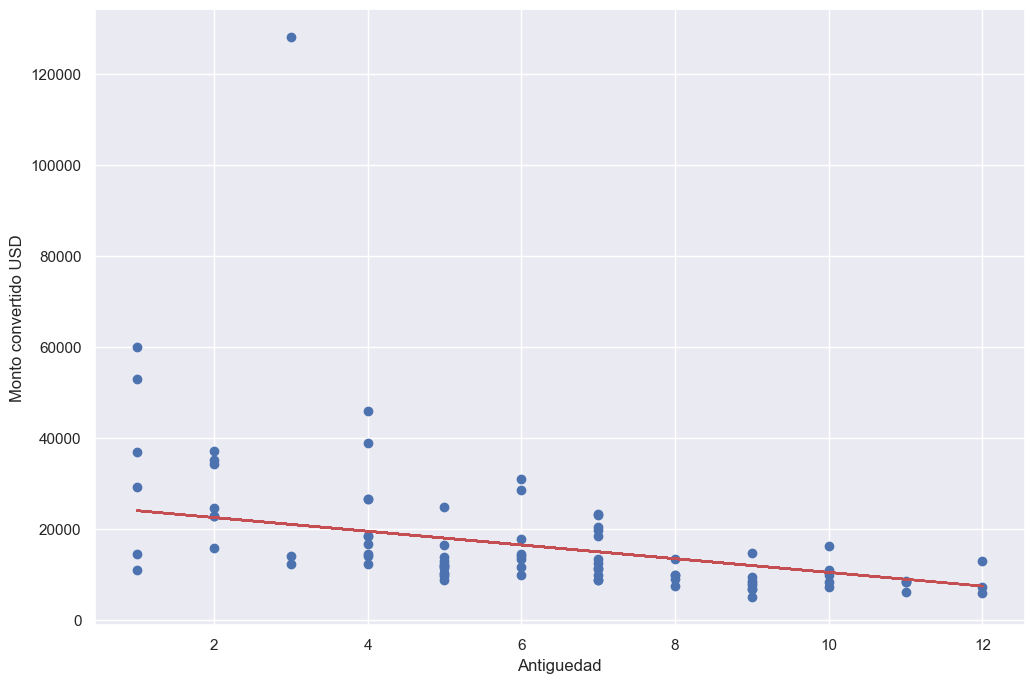

In [69]:
#Ploteamos 
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Antiguedad')
plt.ylabel('Monto convertido USD')
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_encoded_nac_age[['age']]
Y = df_encoded_nac_age['monto_convertido']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression().fit(x_train, y_train)

print('Puntaje de entrenamiento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Puntaje de entrenamiento:  0.25559612230033546
Puntaje de Testing:  0.24251693228047622


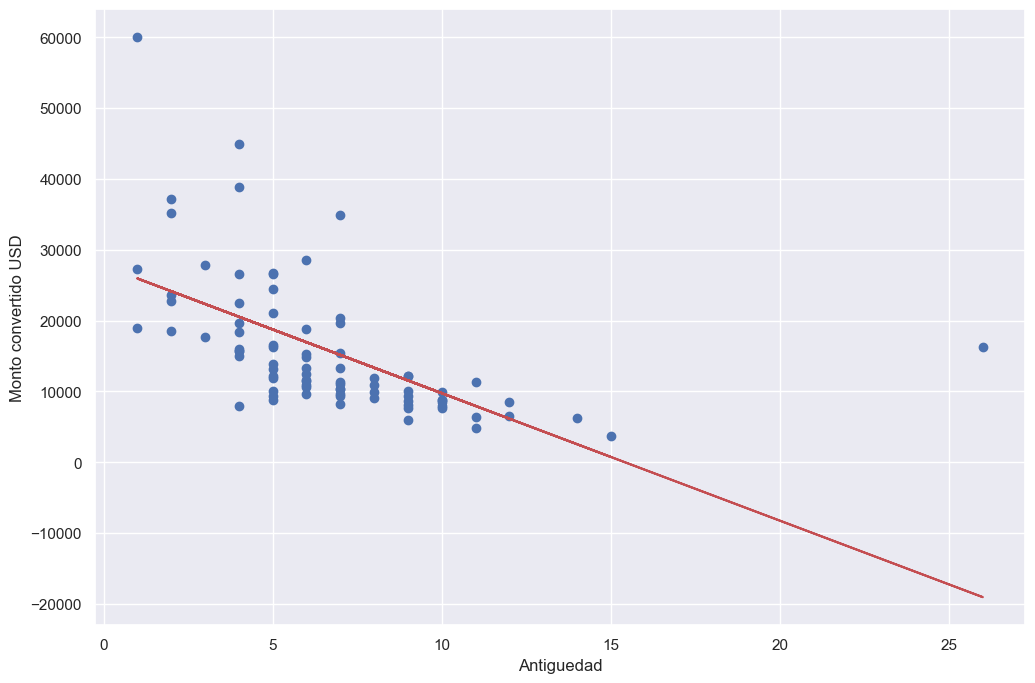

In [71]:
#Ploteamos 
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Antiguedad')
plt.ylabel('Monto convertido USD')
plt.show()

REGRESION MULTIPLE

In [72]:
#Regresion lineal con varias caracteristicas
X = df_encoded_nac_age[['age', 'kilometres']]
Y = df_encoded_nac_age['monto_convertido']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression().fit(x_train, y_train)

print('Puntaje de entrenamiento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Puntaje de entrenamiento:  0.24989483452845762
Puntaje de Testing:  0.2226207859202196


In [73]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.24989483452845762


In [74]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

age          -1907.168201
kilometres       0.017316
dtype: float64


In [75]:
y_pred = linear_model.predict(x_test)

In [76]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual     Predicted
40   29435.423197  24143.889912
485  10000.000000  18924.552121
484   8934.169279  15387.273271
119  20376.175549  16443.555185
285   8777.429467  16997.670288
..            ...           ...
478   6238.244514   4669.142602
313  15360.501567  16841.825415
168  13793.103448  15508.485950
140  13886.520376  19115.029188
234   7868.338558  20935.616904

[83 rows x 2 columns]

<h1> XGBost - Regresion <h1>

 Utilizaremos la biblioteca XGBoost junto con scikit-learn para entrenar el modelo de regresión XGBoost y evaluar su rendimiento en un conjunto de datos. En resumen, este código carga datos, entrena un modelo de regresión XGBoost, hace predicciones y evalúa su rendimiento en términos de error cuadrado medio en un conjunto de prueba.

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separar los datos en conjuntos de entrenamiento y prueba
X = df_encoded_nac_age.drop("monto_convertido", axis=1)  # Obtener las características
y = df_encoded_nac_age["monto_convertido"]  # Obtener el objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el regresor XGBoost
regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=150)

# Entrenar el regresor
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular el error cuadrado medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio:", mse)
print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Error cuadrado medio: 20779389.39542232
Puntaje de Testing:  0.8694078917646386


Probemos con Random Forest

In [79]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separar los datos en conjuntos de entrenamiento y prueba
X = df_encoded_nac_age.drop("monto_convertido", axis=1)  # Obtener las características
y = df_encoded_nac_age["monto_convertido"]  # Obtener el objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de Random Forest
n_estimators = 500  # Número de árboles en el bosque
max_depth = 2    # Profundidad máxima de los árboles (None significa sin restricción)
random_state = 42   # Semilla para reproducibilidad
model_RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
model_RF.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model_RF.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Error cuadrático medio: 92768203.94522648
Puntaje de Testing:  0.4169802057280868


Probemos con Gradien tBoosting

El Gradient Boosting es otra técnica popular de aprendizaje automático que se utiliza comúnmente para problemas de regresión. A diferencia de Random Forest, en Gradient Boosting se construyen árboles secuencialmente, cada uno de los cuales intenta corregir los errores del modelo anterior. 

In [80]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Separar los datos en conjuntos de entrenamiento y prueba
X = df_encoded_nac_age.drop("monto_convertido", axis=1)  # Obtener las características
y = df_encoded_nac_age["monto_convertido"]  # Obtener el objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de Gradient Boosting
n_estimators = 500       # Número de estimadores (árboles) en el conjunto
learning_rate = 0.1      # Tasa de aprendizaje (controla la contribución de cada árbol)
max_depth = 2            # Profundidad máxima de los árboles base
random_state = 42        # Semilla para reproducibilidad
model_GB = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                  max_depth=max_depth, random_state=random_state)
model_GB.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model_GB.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Error cuadrático medio: 19753747.076513343
Puntaje de Testing:  0.8758537401085382




<h1> Stratified- K fold (regresion) <h1>

   El proceso de validación cruzada, también conocido como cross-validation en inglés, es una técnica comúnmente utilizada para evaluar el rendimiento de un modelo de regresión. Consiste en dividir los datos disponibles en un conjunto de entrenamiento y un conjunto de prueba, y luego repetir este proceso varias veces con diferentes divisiones de los datos.
    Luego, creamos una instancia del modelo de regresión lineal y un objeto KFold que se utilizará para dividir los datos en conjuntos de entrenamiento y prueba. A continuación, llamamos a la función cross_val_score para aplicar la validación cruzada al modelo utilizando los datos X e y, y especificamos el objeto KFold creado anteriormente. Los resultados se almacenan en la variable scores, que contiene las puntuaciones R2 obtenidas en cada iteración de la validación cruzada.

In [81]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
df_auto_nac.head()

brand          model        color fuel_type  door        gear  \
0       Toyota  Corolla Cross     Plateado     Nafta   5.0  Automática   
3      Citroën      C4 Cactus  Gris oscuro     Nafta   5.0  Automática   
4       Toyota        Corolla         Gris     Nafta   4.0      Manual   
9   Volkswagen        T-Cross      Naranja     Nafta   5.0  Automática   
12     Renault        Sandero     Plateado     Nafta   5.0      Manual   

            motor body_type  kilometres currency  monto_convertido  age  
0             NaN       SUV         500    pesos      32445.141066    1  
3             NaN       SUV         550  dólares      19000.000000    1  
4             1.8     Sedán        9000    pesos      18181.818182    4  
9   1.6 MSI Nafta       SUV       35000    pesos      21316.614420    4  
12            NaN     Sedán      111111    pesos      10971.786834    1

In [83]:
df_auto_nac_cv = df_auto_nac[[ "kilometres", "age", "monto_convertido"]].copy()
df_auto_nac_cv.head()

kilometres  age  monto_convertido
0          500    1      32445.141066
3          550    1      19000.000000
4         9000    4      18181.818182
9        35000    4      21316.614420
12      111111    1      10971.786834

In [84]:
# separar en X y y
data= df_auto_nac_cv.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(412, 2) (412,)


Utilizaremos Radom Forest como modelo de regresión. Primero, generamos datos de ejemplo X e y. Luego, creamos una instancia del modelo de regresión y un objeto KFold que se utilizará para dividir los datos en conjuntos de entrenamiento y prueba. A continuación, llamamos a la función cross_val_score para aplicar la validación cruzada al modelo utilizando los datos X e y, y especificamos el objeto KFold creado anteriormente (se utilizó K-Fold con 7 divisiones (n_splits=7). Los resultados se almacenan en la variable scores, que contiene las puntuaciones R2 obtenidas en cada iteración de la validación cruzada.

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# crear el modelo
model = RandomForestRegressor(random_state=42, n_estimators=100,max_depth=5)
scores = cross_val_score(model, X, y, cv=7, verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s finished


Finalmente, imprimimos el promedio de las puntuaciones R2 y la desviación estándar para evaluar el rendimiento general del modelo.

In [86]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.24 de r2 promedio con una desviacion estandar de 0.16


<h1>  Halving Randomized Search <h1>

Vamos a realizar una búsqueda aleatoria (Randomized Search) utilizando la estrategia de reducción progresiva (Halving) para encontrar los mejores parámetros para el modelo.

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV


import warnings
warnings.filterwarnings('ignore')

In [88]:
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'random_state': [1, 5, 10, 42], 
   
}

In [89]:
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)


Mejores parametros {'max_depth': 5, 'n_estimators': 300, 'random_state': 10}


<h1> Randomized Search CV <h1>

In [90]:
%%time
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)


Mejores parametros {'random_state': 1, 'n_estimators': 200, 'max_depth': 4}
Wall time: 10.1 s




Cómo conclusion del analisis  de algoritmos de aprendizaje supervisado con el fin de poder predecir valores continuos (en nuestro caso, será el Precio del auto el valor a predecir), y luego de haber trabajado con distintos algoritmos de Regresion buscando optimizar los modelos  realizando hypertuning de sus parámetros con Halving Randomized Search y Randomized Search CV se obtiene las siguientes  tasas de aciertos.

In [91]:
import pandas as pd
from sklearn.metrics import r2_score

# Crear una lista de nombres de modelos y sus correspondientes R^2
model_names = ['LinearRegression', 'XGBRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor']
r2_scores = [0.8183395703084645, 0.8694078917646386, 0.8758537401085382, 0.4169802057280868]  

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame({'Modelo': model_names, 'R^2': r2_scores})

# Imprimir el DataFrame con los resultados

markdown_table = results_df.to_markdown(index=False)
print(markdown_table)

| Modelo                    |      R^2 |
|:--------------------------|---------:|
| LinearRegression          | 0.81834  |
| XGBRegressor              | 0.869408 |
| GradientBoostingRegressor | 0.875854 |
| RandomForestRegressor     | 0.41698  |


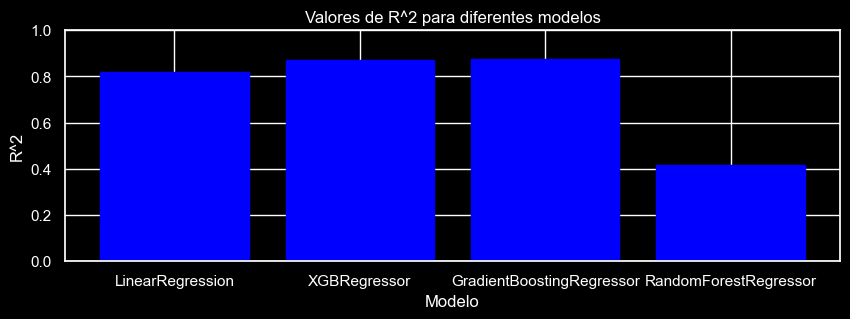

In [92]:
# Cambiar el estilo a fondo negro
plt.style.use('dark_background')

# Crear un gráfico de barras con fondo negro
plt.figure(figsize=(10, 3))
bars = plt.bar(model_names, r2_scores, color='blue')

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('R^2')
plt.title('Valores de R^2 para diferentes modelos')
plt.ylim([0, 1])

# Cambiar el color de las barras
for bar in bars:
    bar.set_color('blue')

# Mostrar el gráfico
plt.show()




Como se observa el modelo Gradient Boosting Regressor  ha demostrado la mayor tasa de aciertos con un porcentaje de  87%.
